# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data importing and Preprocessing

In [2]:
df= pd.read_csv("../dataset/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\r\nHello I am your hot lil horny toy.\r\n ...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [4]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [5]:
df.shape

(18634, 3)

In [6]:
# Count the occurrences of each E-mail type. 
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


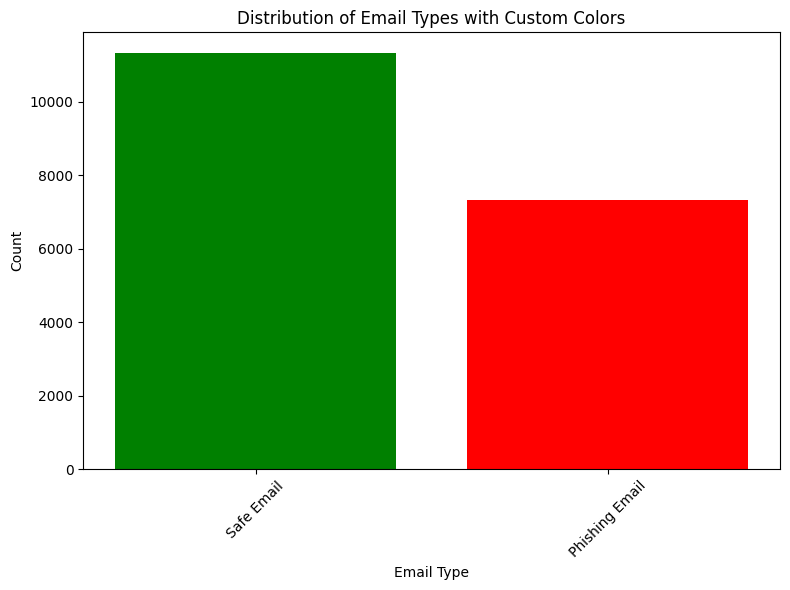

In [7]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

Strategies for Handling Imbalance¶
To address the class imbalance issue, we will consider the following strategies:

1. Resampling Techniques
a. Oversampling: We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

b. Undersampling: We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [8]:
# We will use undersapling technique 
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [9]:
# lets check the sahpe again 
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [10]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,18626,cera conference call & web presentation : tran...,Safe Email
1,184,>>From the Hoax or Hack Dept:\r\nDigital Needl...,Safe Email
2,2650,fw : favor i have your most recent stock grant...,Safe Email
3,9392,Geege Schuman wrote:\r\n> less obscure haiku \...,Safe Email
4,1341,update on lodi and wheeler ridge storage proje...,Safe Email


#### Now , our dataset is ready

In [11]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [12]:
# lets splitting Our Data 
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Build RandomForestClassifier Model

In [13]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

#### training our model

In [14]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

#### prediction

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [17]:
accuracy_score(y_test,y_pred)

0.9302643573381951

In [18]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2116,   82],
       [ 224, 1966]], dtype=int64)

In [19]:
# ! pip install tabulate

from sklearn.metrics import classification_report
from tabulate import tabulate
# Supposons que y_test et y_pred sont déjà définis
report = classification_report(y_test, y_pred, output_dict=True)

# Organisez les données du rapport pour tabulate
table = []
headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for label, metrics in report.items():
    if isinstance(metrics, dict):
        row = [label, 
               f"{metrics['precision']:.2f}", 
               f"{metrics['recall']:.2f}", 
               f"{metrics['f1-score']:.2f}", 
               metrics['support']]
        table.append(row)
    elif label == "accuracy":
        row = ["accuracy", "", "", f"{metrics:.2f}", report["macro avg"]["support"]]
        table.append(row)

# Affichage du rapport formaté
print(tabulate(table, headers, tablefmt="grid"))


+----------------+-------------+----------+------------+-----------+
| Class          | Precision   | Recall   |   F1-Score |   Support |
+================+=============+==========+============+===========+
| Phishing Email | 0.90        | 0.96     |       0.93 |      2198 |
+----------------+-------------+----------+------------+-----------+
| Safe Email     | 0.96        | 0.90     |       0.93 |      2190 |
+----------------+-------------+----------+------------+-----------+
| accuracy       |             |          |       0.93 |      4388 |
+----------------+-------------+----------+------------+-----------+
| macro avg      | 0.93        | 0.93     |       0.93 |      4388 |
+----------------+-------------+----------+------------+-----------+
| weighted avg   | 0.93        | 0.93     |       0.93 |      4388 |
+----------------+-------------+----------+------------+-----------+


In [ ]:
# Save the RandomForest model
# classifier.named_steps['classifier'].save('email.h5')

In [23]:
import joblib

joblib.dump(classifier.named_steps['classifier'], 'email.pkl')

['email.pkl']

In [24]:
# Save the TfidfVectorizer
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(classifier.named_steps['tfidf'], f)

## Conclusion
In this notebook, we tackled the important problem of Phishing Email Detection using machine learning techniques. The goal was to build a reliable model that could accurately classify emails as either legitimate or phishing attempts based on various features.

Model Performance
We experimented with two different machine learning models: the Random Forest Classifier. The performance of this models yielded contrasting results:

Random Forest Classifier:

Accuracy: 0.931
The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.